In [1]:
import os
# Set working directory
os.chdir('C:/AI Resume Matcher')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from src.utils import get_word_frequency, get_ngrams, count_stopwords, stopword_ratio
# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Load train CSV
train = pd.read_csv('data/processed/train.csv')
train.columns

Index(['cv_id', 'jd_id', 'cv_jd_similarity', 'cv_skill', 'jd_requirement',
       'skill_requirement_similarity', 'ai_prediction', '__index_level_0__'],
      dtype='object')

In [4]:
# Basic statistics
print('Dataset Info:')
print(train.info())
print('\nMissing Values:')
print(train.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5224 entries, 0 to 5223
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cv_id                         5224 non-null   object 
 1   jd_id                         5224 non-null   object 
 2   cv_jd_similarity              5224 non-null   float64
 3   cv_skill                      5224 non-null   object 
 4   jd_requirement                5224 non-null   object 
 5   skill_requirement_similarity  5224 non-null   float64
 6   ai_prediction                 5224 non-null   int64  
 7   __index_level_0__             5224 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 326.6+ KB
None

Missing Values:
cv_id                           0
jd_id                           0
cv_jd_similarity                0
cv_skill                        0
jd_requirement                  0
skill_requirement_similarity    0


In [5]:
# Show first 5 rows
print('First 5 Rows:')
print(train[['cv_skill', 'jd_requirement']].head())

First 5 Rows:
                                            cv_skill  \
0  Quickly learn new technologies and adapt to ch...   
1      UI/UX & Design Tools: Material UI, Ant Design   
2            Basic knowledge of Java, HTML, CSS, PHP   
3            Good teamwork skills, easy to integrate   
4  Skills in interacting and collaborating with o...   

                                      jd_requirement  
0  Willingness to research and stay updated on ad...  
1                      Frontend: ReactJS, TypeScript  
2  Familiar with JSON and log debugging. Knowledg...  
3  Exhibiting good teamwork spirit and a willingn...  
4  Experience with UI development and front-end t...  


In [6]:
# Text length analysis
train['skill_length'] = train['cv_skill'].apply(lambda x: len(str(x).split()))
train['req_length'] = train['jd_requirement'].apply(lambda x: len(str(x).split()))
print('\nText Length Stats:')
print(train[['skill_length', 'req_length']].describe())


Text Length Stats:
       skill_length   req_length
count   5224.000000  5224.000000
mean      11.393568     9.337098
std        8.230557     4.342889
min        3.000000     3.000000
25%        7.000000     6.000000
50%        9.000000     9.000000
75%       14.000000    12.000000
max      103.000000    34.000000


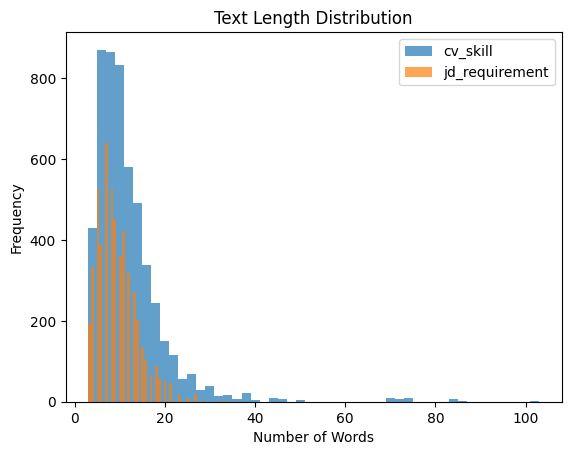

In [7]:
#Text length visualization
plt.hist(train['skill_length'], bins=50, alpha=0.7, label='cv_skill')
plt.hist(train['req_length'], bins=50, alpha=0.7, label='jd_requirement')
plt.legend()
plt.title('Text Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


In [8]:
# Word frequency
print('\nTop 10 Words in cv_skill:')
print(get_word_frequency(train['cv_skill']))
print('\nTop 10 Words in jd_requirement:')
print(get_word_frequency(train['jd_requirement']))


Top 10 Words in cv_skill:

Top 15 words:
and: 4351
with: 1357
for: 637
experience: 631
proficient: 621
using: 614
knowledge: 491
data: 449
skills: 418
experienced: 374
ability: 361
strong: 358
the: 349
communication: 319
have: 314
[('and', 4351), ('with', 1357), ('for', 637), ('experience', 631), ('proficient', 621), ('using', 614), ('knowledge', 491), ('data', 449), ('skills', 418), ('experienced', 374), ('ability', 361), ('strong', 358), ('the', 349), ('communication', 319), ('have', 314)]

Top 10 Words in jd_requirement:

Top 15 words:
and: 3031
with: 1519
experience: 1248
knowledge: 605
strong: 552
ability: 530
good: 508
familiarity: 382
understanding: 380
skills: 355
such: 346
work: 295
communication: 294
the: 284
data: 282
[('and', 3031), ('with', 1519), ('experience', 1248), ('knowledge', 605), ('strong', 552), ('ability', 530), ('good', 508), ('familiarity', 382), ('understanding', 380), ('skills', 355), ('such', 346), ('work', 295), ('communication', 294), ('the', 284), ('dat

In [9]:
# Unique job names from jd_requirement
print('\nNumber of Unique jd_requirement Values:', train['jd_requirement'].nunique())
print('\nSample Unique jd_requirement Values (first 10):')
print(train['jd_requirement'].dropna().unique()[:10])


Number of Unique jd_requirement Values: 1071

Sample Unique jd_requirement Values (first 10):
['Willingness to research and stay updated on advancements in Generative AI and related fields.'
 'Frontend: ReactJS, TypeScript'
 'Familiar with JSON and log debugging. Knowledge of Python and MS SQL is nice to have.'
 'Exhibiting good teamwork spirit and a willingness to understand the various roles played by fellow team members and logical thinking.'
 'Experience with UI development and front-end technologies from'
 'Have knowledge Python language'
 'Ability to collaborate effectively in a team-oriented environment.'
 'Good at MS SQL Server (relational database), stored procedures;'
 'Familiarity with front-end frameworks, particularly ReactJS.'
 'Excellent knowledge on Compilers, Debuggers for different micro-controllers']


In [10]:
# N-grams (bigrams)
print('\nTop 10 Bigrams in cv_skill:')
print(get_ngrams(train['cv_skill'], n=2))
print('\nTop 10 Bigrams in jd_requirement:')
print(get_ngrams(train['jd_requirement'], n=2))


Top 10 Bigrams in cv_skill:
[(('proficient', 'in'), 593), (('ability', 'to'), 333), (('knowledge', 'of'), 289), (('experienced', 'in'), 287), (('such', 'as'), 285), (('experience', 'in'), 234), (('in', 'using'), 225), (('familiar', 'with'), 217), (('able', 'to'), 197), (('experience', 'with'), 192)]

Top 10 Bigrams in jd_requirement:
[(('experience', 'with'), 527), (('ability', 'to'), 527), (('knowledge', 'of'), 455), (('familiarity', 'with'), 382), (('understanding', 'of'), 374), (('experience', 'in'), 352), (('such', 'as'), 345), (('to', 'work'), 235), (('is', 'a'), 215), (('experience', 'working'), 184)]


In [11]:
# Stopword analysis
stop_words = set(stopwords.words('english'))
print('\nStopwords in cv_skill:', count_stopwords(train['cv_skill'], stop_words))
print('Stopwords in jd_requirement:', count_stopwords(train['jd_requirement'], stop_words))
print('\nStopword ratio cv_skill:', stopword_ratio(train['cv_skill'], stop_words))
print('Stopword ratio jd_requirement:', stopword_ratio(train['jd_requirement'], stop_words))


Stopwords in cv_skill: 13888
Stopwords in jd_requirement: 12650

Stopword ratio cv_skill: 0.23333333333333334
Stopword ratio jd_requirement: 0.259343543063329


In [12]:
#class balanc check
if 'ai_prediction' in train.columns:
    print('\nClass Balance:')
    print(train['ai_prediction'].value_counts(normalize=True))


Class Balance:
ai_prediction
0    0.517037
1    0.482963
Name: proportion, dtype: float64


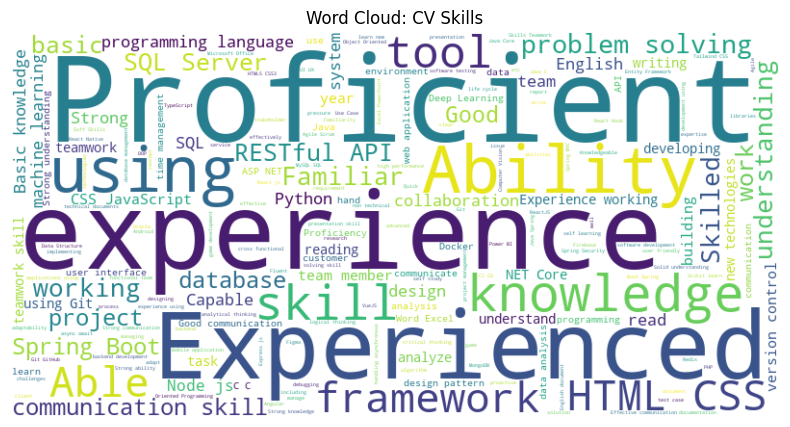

In [13]:
# Word cloud for cv_skill
text = ' '.join(train['cv_skill'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: CV Skills')
plt.show()

In [14]:
# Keyword extraction with TF-IDF
vectorizer = TfidfVectorizer(max_features=10, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(train['cv_skill'].dropna())
keywords = vectorizer.get_feature_names_out()
print('\nTop 10 TF-IDF Keywords in cv_skill:')
print(keywords)


Top 10 TF-IDF Keywords in cv_skill:
['ability' 'communication' 'data' 'experience' 'experienced' 'knowledge'
 'proficient' 'skills' 'sql' 'using']



Correlation Matrix:
                              cv_jd_similarity  skill_requirement_similarity  \
cv_jd_similarity                      1.000000                      0.019492   
skill_requirement_similarity          0.019492                      1.000000   
ai_prediction                        -0.085391                      0.364138   

                              ai_prediction  
cv_jd_similarity                  -0.085391  
skill_requirement_similarity       0.364138  
ai_prediction                      1.000000  


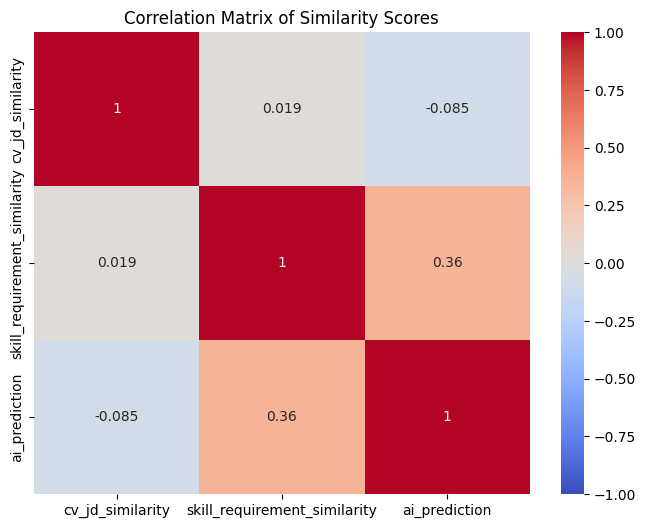

In [15]:
# Correlation analysis with heatmap
numeric_cols = [col for col in train.columns if col in ['cv_jd_similarity', 'skill_requirement_similarity', 'ai_prediction']]
corr_matrix = train[numeric_cols].corr()
print('\nCorrelation Matrix:')
print(corr_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Similarity Scores')
plt.show()

In [16]:
# Unique job names from jd_requirement
print('\nNumber of Unique Job Requirements:', train['jd_requirement'].nunique())
print('\nSample Unique Job Requirements (first 10):')
print(train['jd_requirement'].dropna().unique()[:10])
print('\nTop 20 Bigrams in jd_requirement (Potential Job Titles):')
print(get_ngrams(train['jd_requirement'], n=2, top_k=20))
print('\nSample Job Requirements with Associated Skills:')
job_skill_groups = train.groupby('jd_requirement')['cv_skill'].apply(lambda x: ', '.join(x.dropna())).head(10)
print(job_skill_groups)


Number of Unique Job Requirements: 1071

Sample Unique Job Requirements (first 10):
['Willingness to research and stay updated on advancements in Generative AI and related fields.'
 'Frontend: ReactJS, TypeScript'
 'Familiar with JSON and log debugging. Knowledge of Python and MS SQL is nice to have.'
 'Exhibiting good teamwork spirit and a willingness to understand the various roles played by fellow team members and logical thinking.'
 'Experience with UI development and front-end technologies from'
 'Have knowledge Python language'
 'Ability to collaborate effectively in a team-oriented environment.'
 'Good at MS SQL Server (relational database), stored procedures;'
 'Familiarity with front-end frameworks, particularly ReactJS.'
 'Excellent knowledge on Compilers, Debuggers for different micro-controllers']

Top 20 Bigrams in jd_requirement (Potential Job Titles):
[(('experience', 'with'), 527), (('ability', 'to'), 527), (('knowledge', 'of'), 455), (('familiarity', 'with'), 382), ((